In [1]:
import numpy as np 
import pandas as pd 
import csv
import re, string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
%matplotlib inline

 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 
import pickle
from sklearn import tree


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nltk.stem import WordNetLemmatizer 
from sklearn.ensemble import VotingClassifier


#!pip install gensim
import gensim
from gensim.models import Word2Vec
import logging
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sarangshaikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sarangshaikh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd
data = pd.read_csv("fake_or_real_news_cleaned.csv")
data.head(-1)

,Unnamed: 0,title,text,label,length,Text_Words,lemmed_words,processed
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE,7518,"['daniel', 'journalism', 'fellow', 'freedom', ...","['daniel', 'journalism', 'fellow', 'freedom', ...",daniel journalism fellow freedom center new yo...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646,"['google', 'print', 'delicious', 'pocket', 'th...","['google', 'print', 'delicious', 'pocket', 'th...",google print delicious pocket there two fundam...
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL,2543,"['us', 'secretary', 'state', 'john', 'f', 'sai...","['u', 'secretary', 'state', 'john', 'f', 'said...",u secretary state john f said monday stop pari...
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november 9 2016 lesso...,FAKE,2660,"['king', 'november', 'lesson', 'tonights', 'lo...","['king', 'november', 'lesson', 'tonight', 'los...",king november lesson tonight loss time democra...
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL,1840,"['primary', 'day', 'new', 'york', 'hillary', '...","['primary', 'day', 'new', 'york', 'hillary', '...",primary day new york hillary clinton trump lea...
...,...,...,...,...,...,...,...,...
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,julian assange claimed hillary clinton campaig...,FAKE,2572,"['julian', 'claimed', 'hillary', 'clinton', 'c...","['julian', 'claimed', 'hillary', 'clinton', 'c...",julian claimed hillary clinton campaign attack...
6330,4490,State Department says it can't find emails fro...,state department told republican national comm...,REAL,4076,"['state', 'department', 'told', 'republican', ...","['state', 'department', 'told', 'republican', ...",state department told republican national comm...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted ...,FAKE,14323,"['p', 'pbs', 'stand', 'plutocratic', 'pentagon...","['p', 'pb', 'stand', 'plutocratic', 'pentagon'...",p pb stand plutocratic pentagon posted oct in ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protesters tools oligarchy reform a...,FAKE,11974,"['protesters', 'tools', 'oligarchy', 'always',...","['protester', 'tool', 'oligarchy', 'always', '...",protester tool oligarchy always provokes rage ...


In [3]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [4]:
data.head()

,Unnamed: 0,title,text,label,length,Text_Words,lemmed_words,processed
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE,7518,"['daniel', 'journalism', 'fellow', 'freedom', ...","['daniel', 'journalism', 'fellow', 'freedom', ...",daniel journalism fellow freedom center new yo...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646,"['google', 'print', 'delicious', 'pocket', 'th...","['google', 'print', 'delicious', 'pocket', 'th...",google print delicious pocket there two fundam...
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL,2543,"['us', 'secretary', 'state', 'john', 'f', 'sai...","['u', 'secretary', 'state', 'john', 'f', 'said...",u secretary state john f said monday stop pari...
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november 9 2016 lesso...,FAKE,2660,"['king', 'november', 'lesson', 'tonights', 'lo...","['king', 'november', 'lesson', 'tonight', 'los...",king november lesson tonight loss time democra...
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL,1840,"['primary', 'day', 'new', 'york', 'hillary', '...","['primary', 'day', 'new', 'york', 'hillary', '...",primary day new york hillary clinton trump lea...


In [7]:
data['label_numeric'] = data['label'].replace({'FAKE': 0, 'REAL': 1})
data['processed'] = data['processed'].astype('str')
data.head(-1)

,Unnamed: 0,title,text,label,length,Text_Words,lemmed_words,processed,label_numeric
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE,7518,"['daniel', 'journalism', 'fellow', 'freedom', ...","['daniel', 'journalism', 'fellow', 'freedom', ...",daniel journalism fellow freedom center new yo...,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646,"['google', 'print', 'delicious', 'pocket', 'th...","['google', 'print', 'delicious', 'pocket', 'th...",google print delicious pocket there two fundam...,0
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL,2543,"['us', 'secretary', 'state', 'john', 'f', 'sai...","['u', 'secretary', 'state', 'john', 'f', 'said...",u secretary state john f said monday stop pari...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november 9 2016 lesso...,FAKE,2660,"['king', 'november', 'lesson', 'tonights', 'lo...","['king', 'november', 'lesson', 'tonight', 'los...",king november lesson tonight loss time democra...,0
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL,1840,"['primary', 'day', 'new', 'york', 'hillary', '...","['primary', 'day', 'new', 'york', 'hillary', '...",primary day new york hillary clinton trump lea...,1
...,...,...,...,...,...,...,...,...,...
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,julian assange claimed hillary clinton campaig...,FAKE,2572,"['julian', 'claimed', 'hillary', 'clinton', 'c...","['julian', 'claimed', 'hillary', 'clinton', 'c...",julian claimed hillary clinton campaign attack...,0
6330,4490,State Department says it can't find emails fro...,state department told republican national comm...,REAL,4076,"['state', 'department', 'told', 'republican', ...","['state', 'department', 'told', 'republican', ...",state department told republican national comm...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,‘p’ pbs stand ‘plutocratic’ ‘pentagon’ posted ...,FAKE,14323,"['p', 'pbs', 'stand', 'plutocratic', 'pentagon...","['p', 'pb', 'stand', 'plutocratic', 'pentagon'...",p pb stand plutocratic pentagon posted oct in ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protesters tools oligarchy reform a...,FAKE,11974,"['protesters', 'tools', 'oligarchy', 'always',...","['protester', 'tool', 'oligarchy', 'always', '...",protester tool oligarchy always provokes rage ...,0


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 500
max_words = 33786
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['processed'])
sequences = tokenizer.texts_to_sequences(data['processed'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data1 = pad_sequences(sequences, maxlen=maxlen)
print(data1)
def to_one_hot(labels, dimension=2):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_labels = to_one_hot(data['label_numeric'])
labels = np.asarray(one_hot_labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)
indices = np.arange(data1.shape[0])
np.random.shuffle(indices)
data1 = data1[indices]
labels = labels[indices]
"""x_train = data1[:training_samples]
y_train = labels[:training_samples]
x_val = data1[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]
x_test = data1[validation_samples: validation_samples + test_samples]
y_test = labels[validation_samples: validation_samples + test_samples]"""

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, labels, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.03, random_state=0)

Found 33786 unique tokens.
[[3534  630  277 ...   20  314 1517]
 [   0    0    0 ... 2458  679  533]
 [   0    0    0 ...  891  408 5449]
 ...
 [3412   77  116 ...  339   41  227]
 [   6 4068  573 ...  393 1622  901]
 [   0    0    0 ...    2 9712 5790]]
Shape of data tensor: (6335, 9)
Shape of label tensor: (6335, 2)


In [11]:
from gensim.models.keyedvectors import KeyedVectors
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
print('loading word2vec model…')

word2vec_model = KeyedVectors.load_word2vec_format('wiki.en1.bin', binary=True)
def getVector(str):
    if str in word2vec_model:
        return word2vec_model[str]
    else:
        return None;

def isInModel(str):
    return str in word2vec_model

2021-03-04 15:04:44,065 : INFO : loading projection weights from wiki.en1.bin


loading word2vec model…


2021-03-04 15:05:11,629 : INFO : loaded (2519370, 300) matrix from wiki.en1.bin


In [12]:
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = getVector(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Embedding, LSTM
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32,dropout=0.2,
recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(X_train, y_train,
epochs=40,
batch_size=8,
validation_split=0.05, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 300)          10135800  
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 10,178,490
Trainable params: 42,690
Non-trainable params: 10,135,800
_________________________________________________________________
Train on 4814 samples, validate on 254 samples
Epoch 1/40
4814/4814 [==============================] - 83s 17ms/step - loss: 0.5616 - acc: 0.6946 - val_loss: 0.4473 - val_acc: 0.8031
Epoch 2/40
4814/4814 [==============================] - 74s 15ms/step - loss: 0.4636 - acc: 0.7794 - val_loss: 0.4116 - val_acc: 0.8228
Epoch 3/40
4814/4814 [==========================

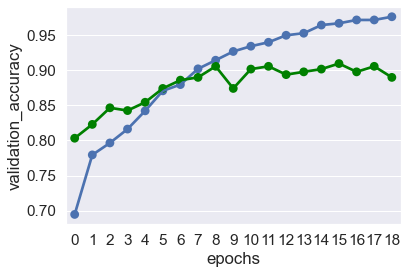

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')
model.save_weights('lstm_model_wiki.h5')

In [28]:
model.load_weights('lstm_model_wiki.h5')
print(model.metrics_names)
model.evaluate(X_test, y_test)

['loss', 'acc']
1267/1267 [==============================] - 3s 2ms/step


[0.31235347454154594, 0.8879242539405823]

In [29]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       649
           1       0.91      0.85      0.88       618

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



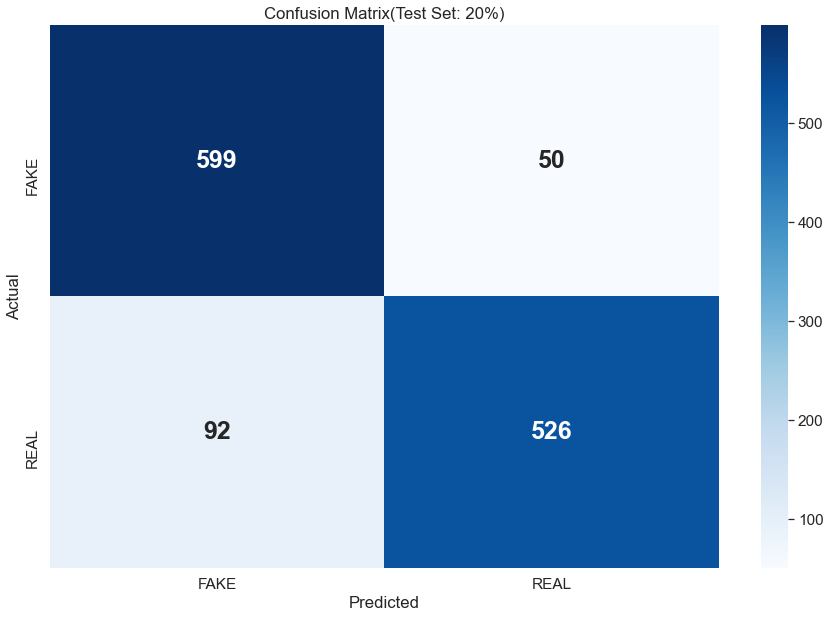

In [30]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize=(15,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25, "weight":"bold"}, cmap='Blues', fmt='d') # font size
plt.title('Confusion Matrix(Test Set: 20%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Embedding, SimpleRNN
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(SimpleRNN(32,dropout=0.2,
recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(X_train, y_train,
epochs=40,
batch_size=8,
validation_split=0.05)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')
model.save_weights('rnn_model_wiki.h5')
model.load_weights('rnn_model_wiki.h5')
print(model.metrics_names)
model.evaluate(X_test, y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 300)          10135800  
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                10656     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 10,146,522
Trainable params: 10,722
Non-trainable params: 10,135,800
_________________________________________________________________
Train on 4814 samples, validate on 254 samples
Epoch 1/40
4814/4814 [==============================] - 47s 10ms/step - loss: nan - acc: 0.4971 - val_loss: nan - val_acc: 0.4843
Epoch 2/40
4814/4814 [==============================] - 47s 10ms/step - loss: nan - acc: 0.4969 - val_loss: nan - val_acc: 0.4843
Epoch 3/40
4814/4814 [==============================] - 49s 

KeyboardInterrupt: 

In [32]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       649
           1       0.00      0.00      0.00       618

    accuracy                           0.51      1267
   macro avg       0.26      0.50      0.34      1267
weighted avg       0.26      0.51      0.35      1267



/Users/sarangshaikh/opt/anaconda3/envs/webapp1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


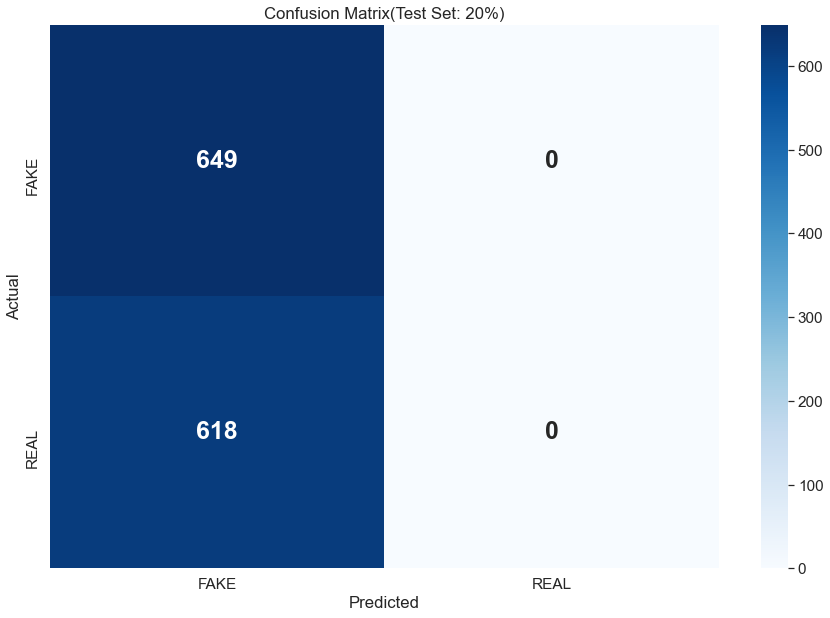

In [33]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize=(15,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25, "weight":"bold"}, cmap='Blues', fmt='d') # font size
plt.title('Confusion Matrix(Test Set: 20%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Embedding, Bidirectional, LSTM
from keras import regularizers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(32,dropout=0.2,
recurrent_dropout=0.2)))
model.add(Dense(2, activation='softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['acc'])
history = model.fit(X_train, y_train,
epochs=40,
batch_size=8,
validation_split=0.05)
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')
model.save_weights('bilstm_model_wiki.h5')
model.load_weights('bilstm_model_wiki.h5')
print(model.metrics_names)
model.evaluate(X_test, y_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 300)          10135800  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                85248     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 10,221,178
Trainable params: 85,378
Non-trainable params: 10,135,800
_________________________________________________________________
Train on 4814 samples, validate on 254 samples
Epoch 1/40
4814/4814 [==============================] - 104s 22ms/step - loss: 0.5609 - acc: 0.7111 - val_loss: 0.4681 - val_acc: 0.8150
Epoch 2/40
4814/4814 [==============================] - 103s 21ms/step - loss: 0.4703 - acc: 0.7730 - val_loss: 0.4538 - val_acc: 0.7913
Epoch 3/40
4814/4814 [========================

KeyboardInterrupt: 

In [35]:
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       649
           1       0.87      0.93      0.90       618

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



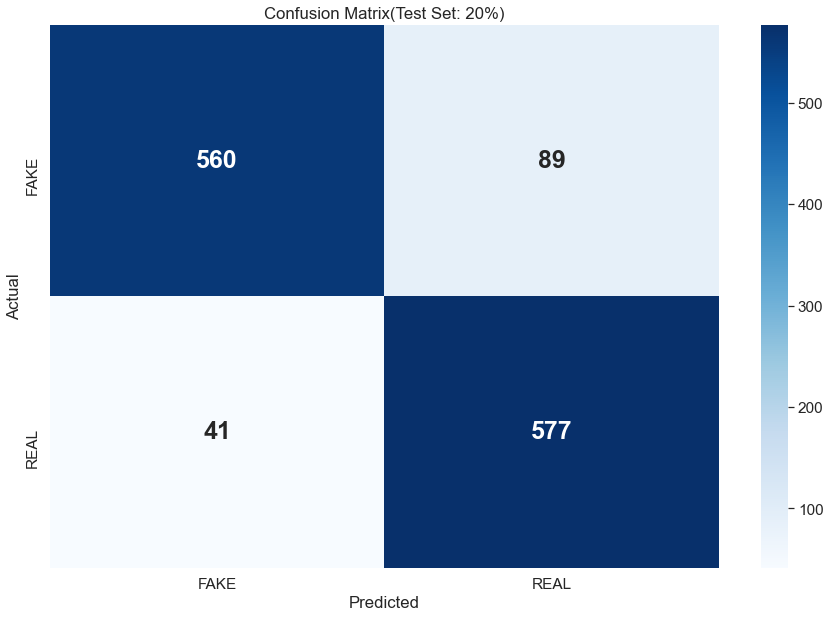

In [36]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

labels = ['FAKE', 'REAL']
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
df_cm = pd.DataFrame(cm, labels, labels)
plt.figure(figsize=(15,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 25, "weight":"bold"}, cmap='Blues', fmt='d') # font size
plt.title('Confusion Matrix(Test Set: 20%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()